<a href="https://colab.research.google.com/github/satabarto123/DenV1/blob/main/DENV1_World_Wide.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install --upgrade biopython # Make sure you have the latest version of Biopython

from Bio import SeqIO
try:
    from Bio.SeqUtils import gc_fraction
    def GC(sequence):
        return 100 * gc_fraction(sequence, ambiguous="ignore")
except ImportError:
    # Older versions have this:
    from Bio.SeqUtils import GC

import pandas as pd
import os
import glob
from google.colab import drive
drive.mount('/content/drive')
!ls /content/drive/MyDrive/DenV1


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 2.2 MB/s eta 0:00:00
Mounted at /content/drive
'EEG & ZWT based Emotion Detection'
 marked_sequences.fasta
'maximum_likelihood_bootstrap_consensus_tree(btstrap 700)(attempt 1)(mains).mtsx'
'maximum_likelihood_bootstrap_consensus_tree(btstrap 700)(attempt 1).mtsx'
'minimum_evolution_bootstrap_consensus_tree(btstrap 700)(attempt 1).mtsx'
'minimum_evolution_bootstrap_consensus_tree(btstrap 700).mtsx'
'neighbour_joining_bootstrap_consensus_tree(attempt1 bootstrap 700).mtsx'
 neighbour_joining_bootstrap_consensus_tree.mtsx
'sequence-southeast-asian(non-indian).fasta'
 temp_sequences.fasta
 worldwide-sequences.fasta


In [3]:
file_directory='/content/drive/MyDrive/DenV1/worldwide-sequences.fasta'

In [4]:
from Bio import SeqIO
from Bio.SeqUtils import gc_fraction # Use gc_fraction for GC content calculation
import pandas as pd
import os
import glob
from google.colab import drive
def gc3_content(sequence):
    """Calculates the GC content of the third position of codons in a sequence."""
    gc3_count = 0
    total_codons = 0
    for i in range(0, len(sequence), 3):
        codon = sequence[i:i+3]
        if len(codon) == 3:
            total_codons += 1
            if codon[2] in ['G', 'C']:
                gc3_count += 1
    if total_codons == 0:
        return 0
    return (gc3_count / total_codons) * 100

gc3_values = []
for record in SeqIO.parse(file_directory, "fasta"):
    gc3_value = gc3_content(str(record.seq))
    gc3_values.append({'ID': record.id, 'GC3': gc3_value})

df = pd.DataFrame(gc3_values)
print(df)

              ID        GC3
0     KU509264.1  46.530015
1     KU509251.1  46.413994
2     KJ189332.1  43.373143
3     KF973473.1  43.389633
4     KU509255.1  43.105951
...          ...        ...
1093  JQ287662.1  45.899835
1094  KP188543.1  46.248969
1095  KP188544.1  49.903820
1096  JQ287667.1  46.387521
1097  JQ287663.1  45.644599

[1098 rows x 2 columns]


In [5]:
def gc3_content(sequence):
    """Calculates the GC content of the third position of codons in a sequence."""
    gc3_count = 0
    total_codons = 0
    for i in range(0, len(sequence), 3):
        codon = sequence[i:i+3]
        if len(codon) == 3:
            total_codons += 1
            if codon[2] in ['G', 'C']:
                gc3_count += 1
    if total_codons == 0:
        return 0  # Avoid division by zero
    return (gc3_count / total_codons) * 100

def calculate_enc(sequence):
    """Calculates the effective number of codons (ENc) for a given sequence."""
    codon_counts = {}
    for i in range(0, len(sequence), 3):
        codon = sequence[i:i+3]
        if len(codon) == 3:
            codon_counts[codon] = codon_counts.get(codon, 0) + 1

    num_codons = len(codon_counts)
    if num_codons <= 1:
        return 0  # Handle cases with too few codons

    f_values = [count / sum(codon_counts.values()) for count in codon_counts.values()]
    f_squared_sum = sum(f ** 2 for f in f_values)

    enc = 2 + 9 / (f_squared_sum) + 1 / (sum(f ** 3 for f in f_values))
    return enc

# Process the FASTA file
results = []
for record in SeqIO.parse(file_directory, "fasta"):
    gc3_value = gc3_content(str(record.seq))
    enc_value = calculate_enc(str(record.seq))
    results.append({'ID': record.id, 'GC3': gc3_value, 'ENc': enc_value})

# Create a DataFrame and display the results
df = pd.DataFrame(results)
print(df)


              ID        GC3          ENc
0     KU509264.1  46.530015  2001.328791
1     KU509251.1  46.413994  2004.980553
2     KJ189332.1  43.373143  2365.259283
3     KF973473.1  43.389633  2355.609712
4     KU509255.1  43.105951  2332.160409
...          ...        ...          ...
1093  JQ287662.1  45.899835  2108.606689
1094  KP188543.1  46.248969  2115.568976
1095  KP188544.1  49.903820  2297.954072
1096  JQ287667.1  46.387521  2135.849448
1097  JQ287663.1  45.644599  2127.347352

[1098 rows x 3 columns]


In [6]:
import pandas as pd
def calculate_enc(sequence):
    """Calculates the effective number of codons (ENc) for a given sequence."""
    codon_counts = {}
    for i in range(0, len(sequence), 3):
        codon = sequence[i:i+3]
        if len(codon) == 3:
            codon_counts[codon] = codon_counts.get(codon, 0) + 1

    num_codons = len(codon_counts)
    if num_codons <= 1:
        return 0

    f_values = [count / sum(codon_counts.values()) for count in codon_counts.values()]
    f_squared_sum = sum(f ** 2 for f in f_values)

    enc = 2 + 9 / (f_squared_sum) + 1 / (sum(f ** 3 for f in f_values))
    return enc

results = []
for record in SeqIO.parse(file_directory, "fasta"):
    gc3_value = gc3_content(str(record.seq))
    enc_value = calculate_enc(str(record.seq))
    length = len(record.seq)
    results.append({'ID': record.id, 'GC3': gc3_value, 'ENc': enc_value, 'Length': length})

df = pd.DataFrame(results)
print(df)

df


              ID        GC3          ENc  Length
0     KU509264.1  46.530015  2001.328791   10246
1     KU509251.1  46.413994  2004.980553   10290
2     KJ189332.1  43.373143  2365.259283   10301
3     KF973473.1  43.389633  2355.609712   10304
4     KU509255.1  43.105951  2332.160409   10335
...          ...        ...          ...     ...
1093  JQ287662.1  45.899835  2108.606689   10904
1094  KP188543.1  46.248969  2115.568976   10917
1095  KP188544.1  49.903820  2297.954072   10917
1096  JQ287667.1  46.387521  2135.849448   10962
1097  JQ287663.1  45.644599  2127.347352   11195

[1098 rows x 4 columns]


,ID,GC3,ENc,Length
0,KU509264.1,46.530015,2001.328791,10246
1,KU509251.1,46.413994,2004.980553,10290
2,KJ189332.1,43.373143,2365.259283,10301
3,KF973473.1,43.389633,2355.609712,10304
4,KU509255.1,43.105951,2332.160409,10335
...,...,...,...,...
1093,JQ287662.1,45.899835,2108.606689,10904
1094,KP188543.1,46.248969,2115.568976,10917
1095,KP188544.1,49.903820,2297.954072,10917
1096,JQ287667.1,46.387521,2135.849448,10962


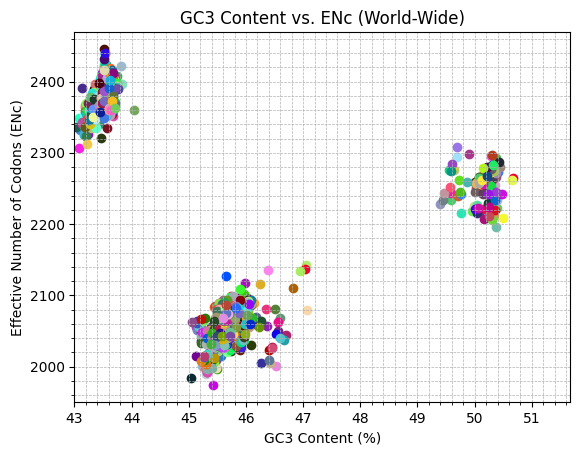

In [9]:
import matplotlib.pyplot as plt
import random

colors = [
    "#" + "".join([random.choice("0123456789ABCDEF") for j in range(6)])
    for i in range(len(df))
]

fig, ax = plt.subplots()

for i in range(len(df)):
    ax.scatter(df['GC3'][i], df['ENc'][i], color=colors[i], label=df['ID'][i])

ax.set_xlabel('GC3 Content (%)')
ax.set_ylabel('Effective Number of Codons (ENc)')
ax.set_title('GC3 Content vs. ENc (World-Wide)')

ax.set_xlim(43, df['GC3'].max() + 1)

ax.grid(True, which='both', linestyle='--', linewidth=0.5)
ax.minorticks_on()

plt.show()


In [10]:


from collections import Counter

def calculate_rscu(sequence):
    """Calculates the Relative Synonymous Codon Usage (RSCU) for each codon."""
    codon_counts = Counter()
    for i in range(0, len(sequence), 3):
        codon = sequence[i:i + 3]
        if len(codon) == 3:
            codon_counts[codon] += 1

    rscu_values = {}
    for codon, count in codon_counts.items():
        synonymous_codons = [c for c in codon_counts if c[0:2] == codon[0:2]]
        num_synonymous = len(synonymous_codons)
        if num_synonymous > 1:
            expected_frequency = sum(codon_counts[c] for c in synonymous_codons) / num_synonymous
            rscu_values[codon] = count / expected_frequency
        else:
            rscu_values[codon] = 1.0
    return rscu_values

rscu_results = []
for record in SeqIO.parse(file_directory, "fasta"):
    rscu_values = calculate_rscu(str(record.seq))
    rscu_results.append({'ID': record.id, 'RSCU': rscu_values})

for result in rscu_results:
    print(f"Sequence ID: {result['ID']}")
    for codon, rscu in result['RSCU'].items():
        print(f"  {codon}: {rscu:.2f}")

highly_expressed = []
lowly_expressed = []
for result in rscu_results:
    for codon, rscu in result['RSCU'].items():
        if rscu > 1.2:
            highly_expressed.append((result['ID'], codon, rscu))
        elif rscu < 0.8:
            lowly_expressed.append((result['ID'], codon, rscu))

print("\nHighly Expressed Codons (RSCU > 1.2):")
for seq_id, codon, rscu in highly_expressed:
    print(f"  {seq_id}: {codon} ({rscu:.2f})")

print("\nLowly Expressed Codons (RSCU < 0.8):")
for seq_id, codon, rscu in lowly_expressed:
    print(f"  {seq_id}: {codon} ({rscu:.2f})")


Streaming output truncated to the last 5000 lines.
  FJ410206.1: TTA (0.76)
  FJ410206.1: AGC (0.66)
  FJ410206.1: ACG (0.48)
  FJ410206.1: CCG (0.38)
  FJ410206.1: AAT (0.61)
  FJ410206.1: GCG (0.32)
  FJ410206.1: ACT (0.63)
  FJ410206.1: CTC (0.56)
  FJ410206.1: GGC (0.48)
  FJ410206.1: CCC (0.68)
  FJ410206.1: ATT (0.66)
  FJ410206.1: GGT (0.51)
  FJ410206.1: ATC (0.67)
  FJ410206.1: CCT (0.76)
  FJ410206.1: CAT (0.74)
  FJ410206.1: GGG (0.71)
  FJ410206.1: GTC (0.72)
  FJ410206.1: TGC (0.80)
  FJ410206.1: TGT (0.75)
  FJ410206.1: GTA (0.72)
  FJ410206.1: TCG (0.21)
  FJ410206.1: TGA (0.10)
  FJ410206.1: TAG (0.14)
  KF955427.1: ACG (0.60)
  KF955427.1: ATC (0.69)
  KF955427.1: AGC (0.66)
  KF955427.1: AAC (0.76)
  KF955427.1: GTA (0.66)
  KF955427.1: TAT (0.70)
  KF955427.1: GAT (0.62)
  KF955427.1: GTC (0.59)
  KF955427.1: GAC (0.58)
  KF955427.1: ATA (0.48)
  KF955427.1: TGC (0.52)
  KF955427.1: GCG (0.67)
  KF955427.1: TGT (0.70)
  KF955427.1: CAC (0.55)
  KF955427.1: AGT (0.47)

In [11]:

from collections import Counter

def calculate_rscu(sequence):
    codon_counts = Counter()
    for i in range(0, len(sequence), 3):
        codon = sequence[i:i + 3]
        if len(codon) == 3:
            codon_counts[codon] += 1

    rscu_values = {}
    for codon, count in codon_counts.items():
        synonymous_codons = [c for c in codon_counts if c[0:2] == codon[0:2]]
        num_synonymous = len(synonymous_codons)
        if num_synonymous > 1:
            expected_frequency = sum(codon_counts[c] for c in synonymous_codons) / num_synonymous
            rscu_values[codon] = count / expected_frequency
        else:
            rscu_values[codon] = 1.0
    return rscu_values

rscu_results = []
for record in SeqIO.parse(file_directory, "fasta"):
    rscu_values = calculate_rscu(str(record.seq))
    rscu_results.append({'ID': record.id, 'RSCU': rscu_values})

for result in rscu_results:
    print(f"Sequence ID: {result['ID']}")
    for codon, rscu in result['RSCU'].items():
        print(f"  {codon}: {rscu:.2f}")

highly_expressed = []
lowly_expressed = []
for result in rscu_results:
    for codon, rscu in result['RSCU'].items():
        if rscu > 1.2:
            highly_expressed.append((result['ID'], codon, rscu))
        elif rscu < 0.8:
            lowly_expressed.append((result['ID'], codon, rscu))

print("\nHighly Expressed Codons (RSCU > 1.2):")
for seq_id, codon, rscu in highly_expressed:
    print(f"  {seq_id}: {codon} ({rscu:.2f})")

print("\nLowly Expressed Codons (RSCU < 0.8):")
for seq_id, codon, rscu in lowly_expressed:
    print(f"  {seq_id}: {codon} ({rscu:.2f})")


Streaming output truncated to the last 5000 lines.
  FJ410206.1: TTA (0.76)
  FJ410206.1: AGC (0.66)
  FJ410206.1: ACG (0.48)
  FJ410206.1: CCG (0.38)
  FJ410206.1: AAT (0.61)
  FJ410206.1: GCG (0.32)
  FJ410206.1: ACT (0.63)
  FJ410206.1: CTC (0.56)
  FJ410206.1: GGC (0.48)
  FJ410206.1: CCC (0.68)
  FJ410206.1: ATT (0.66)
  FJ410206.1: GGT (0.51)
  FJ410206.1: ATC (0.67)
  FJ410206.1: CCT (0.76)
  FJ410206.1: CAT (0.74)
  FJ410206.1: GGG (0.71)
  FJ410206.1: GTC (0.72)
  FJ410206.1: TGC (0.80)
  FJ410206.1: TGT (0.75)
  FJ410206.1: GTA (0.72)
  FJ410206.1: TCG (0.21)
  FJ410206.1: TGA (0.10)
  FJ410206.1: TAG (0.14)
  KF955427.1: ACG (0.60)
  KF955427.1: ATC (0.69)
  KF955427.1: AGC (0.66)
  KF955427.1: AAC (0.76)
  KF955427.1: GTA (0.66)
  KF955427.1: TAT (0.70)
  KF955427.1: GAT (0.62)
  KF955427.1: GTC (0.59)
  KF955427.1: GAC (0.58)
  KF955427.1: ATA (0.48)
  KF955427.1: TGC (0.52)
  KF955427.1: GCG (0.67)
  KF955427.1: TGT (0.70)
  KF955427.1: CAC (0.55)
  KF955427.1: AGT (0.47)

In [12]:
import itertools

all_codons = ["".join(c) for c in itertools.product("ACGT", repeat=3)]
rscu_df = pd.DataFrame(index=all_codons, columns=['RSCU1', 'RSCU2'])


for result in rscu_results:
    for codon, rscu in result['RSCU'].items():
        if codon in rscu_df.index:
            rscu_df.loc[codon, 'RSCU1'] = max(rscu_df.loc[codon, 'RSCU1'], rscu) if pd.notna(rscu_df.loc[codon, 'RSCU1']) else rscu
            rscu_df.loc[codon, 'RSCU2'] = min(rscu_df.loc[codon, 'RSCU2'], rscu) if pd.notna(rscu_df.loc[codon, 'RSCU2']) else rscu

rscu_df.fillna(0, inplace=True)
print(rscu_df)


        RSCU1     RSCU2
AAA  1.771261  1.151515
AAC  1.111111  0.695652
AAG  1.522727  0.738609
AAT  1.319095  0.422857
ACA  1.921875  1.161905
..        ...       ...
TGT  1.006098   0.56129
TTA  0.886878  0.409449
TTC  1.360294  0.765027
TTG  1.673913  0.698413
TTT  1.818182  0.691892

[64 rows x 2 columns]


In [13]:
import pandas as pd
gc_values = []
gc3_values = []

for record in SeqIO.parse(file_directory, "fasta"):
    sequence = str(record.seq)
    gc_values.append({'ID': record.id, 'GC': GC(sequence)})
    gc3_values.append({'ID': record.id, 'GC3': gc3_content(sequence)})

df_gc = pd.DataFrame(gc_values)
df_gc3 = pd.DataFrame(gc3_values)

df_combined = pd.merge(df_gc, df_gc3, on='ID')

print(df_combined)


              ID         GC        GC3
0     KU509264.1  46.486434  46.530015
1     KU509251.1  46.433431  46.413994
2     KJ189332.1  46.228522  43.373143
3     KF973473.1  46.224767  43.389633
4     KU509255.1  46.376391  43.105951
...          ...        ...        ...
1093  JQ287662.1  46.725972  45.899835
1094  KP188543.1  46.496290  46.248969
1095  KP188544.1  46.523770  49.903820
1096  JQ287667.1  46.989600  46.387521
1097  JQ287663.1  46.949531  45.644599

[1098 rows x 3 columns]


In [14]:
import pandas as pd
import numpy as np

def calculate_cai(reference_rscu):

  cai_values = []
  for codon, rscu in reference_rscu.items():
    amino_acid = codon[:2]
    max_rscu = reference_rscu[reference_rscu.index.str.startswith(amino_acid)].max()
    relative_adaptiveness = rscu / max_rscu
    cai = np.exp(np.log(relative_adaptiveness))
    cai_values.append({'codon': codon, 'CAI': cai})

  return pd.DataFrame(cai_values)

cai_df1 = calculate_cai(rscu_df['RSCU1'])
cai_df2 = calculate_cai(rscu_df['RSCU2'])

print("CAI using RSCU1:")
print(cai_df1)
print("\nCAI using RSCU2:")
print(cai_df2)


CAI using RSCU1:
   codon       CAI
0    AAA  1.000000
1    AAC  0.627299
2    AAG  0.859685
3    AAT  0.744721
4    ACA  1.000000
..   ...       ...
59   TGT  0.340206
60   TTA  0.487783
61   TTC  0.748162
62   TTG  0.920652
63   TTT  1.000000

[64 rows x 2 columns]

CAI using RSCU2:
   codon       CAI
0    AAA  1.000000
1    AAC  0.604119
2    AAG  0.641424
3    AAT  0.367218
4    ACA  1.000000
..   ...       ...
59   TGT  0.542328
60   TTA  0.535208
61   TTC  1.000000
62   TTG  0.912925
63   TTT  0.904402

[64 rows x 2 columns]


In [15]:
import pandas as pd
import numpy as np

def calculate_correlations(df):

  df['GC3'] = pd.to_numeric(df['GC3'], errors='coerce')
  df['ENc'] = pd.to_numeric(df['ENc'], errors='coerce')



  df = df.dropna(subset=['GC3', 'ENc', 'Length'])

  if not pd.api.types.is_numeric_dtype(df['GC3']) or not pd.api.types.is_numeric_dtype(df['ENc']):
    raise ValueError("GC3 or ENc column is not numeric")

  correlation_gc3 = df['Length'].corr(df['GC3'])
  correlation_enc = df['Length'].corr(df['ENc'])

  return correlation_gc3, correlation_enc

correlation_gc3, correlation_enc = calculate_correlations(df)
print(f"Correlation between  Length and GC3: {correlation_gc3:.2f}")
print(f"Correlation between  Length and ENc: {correlation_enc:.2f}")



Correlation between  Length and GC3: -0.06
Correlation between  Length and ENc: 0.08


In [16]:

from scipy import stats

t_statistic_enc, p_value_enc = stats.ttest_rel(df['Length'], df['ENc'])

print(f"T-test for Length and ENc:")
print(f"  T-statistic: {t_statistic_enc:.2f}")
print(f"  P-value: {p_value_enc:.3f}")

t_statistic_gc3, p_value_gc3 = stats.ttest_rel(df['Length'], df['GC3'])

print("\nT-test for Length and GC3:")
print(f"  T-statistic: {t_statistic_gc3:.2f}")
print(f"  P-value: {p_value_gc3:.3f}")



T-test for Length and ENc:
  T-statistic: 1570.95
  P-value: 0.000

T-test for Length and GC3:
  T-statistic: 3267.71
  P-value: 0.000


In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

features = ['Length', 'GC3', 'ENc']
X = df[features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)

pca_df = pd.DataFrame(data=principal_components, columns=['Principal Component 1', 'Principal Component 2'])

pca_df['ID'] = df['ID']

print(pca_df)

print("\nExplained Variance Ratio:")
print(pca.explained_variance_ratio_)

"""
Explanation:

 1. Feature Selection: ‘Length’, ‘GC3’, ‘ENc’ are taken from your DataFrame since these are the only numerical features you have calculated and they seem to be relevant for analysis.

 2. Standardization: StandardScaler is used for the standardization of the features. It is important for PCA because it is scale sensitive meaning that the scales of the features will affect the outcomes. Standardization normalizes all the features in as much as they are scaled in a way that will give them a mean value of 0 and standard deviation of 1.

 3. PCA: Because the number of genes is large, we perform PCA two and extract the variation that are most important.

 4. PCA DataFrame: They make a DataFrame ’pca_df’ where they insert PC1 and PC2, and insert sequence IDs for better orientation.

 5. Explained Variance Ratio: The ‘explained_variance_ratio_’ attribute of the PCA object gives out the proportion of the overall variance in the data which is explained by the principal component.

 6. Plot: Using Cytoscape, we display the results by using a scatter plot in which PC1 is plotted against PC2.

 Interpretation:

 - In general, each of the principal components is a weighted sum of the initial variables.
 - Thus, representing extra dimension of assortment which is illustrated by constructing the link between variables, PC1 reflects the maximal dispersion in the field of certain indicators.
 - PC2 on the other hand captures the second highest variance, this is perpendicular to PC2.
 - The ‘explained variance ratio’ gives an indication of the amount of information that is retained by each of the principal components.
 - On the plot the author proves how the sequences get grouped or spread depending on the PC values.

 Values in the PCA DataFrame:Values in the PCA DataFrame:

 - 'Principal Component 1' and 'Principal Component 2': These are the co-ordinates of each sequence in the reduced dimensional space formed by the principal components of the first morphological data scenario.
 - 'ID': The is the sequence identifier corresponding to each of the rows.

 Only if the first components of the principal axes have low values and correspond similar values on the ‘score’ column of the principal components, the new values in the columns of the principal component have to be obtained by projecting the original standardized feature values onto the principal component axes. These values indicate the extent of contribution that each sequence has got towards the variation that is explained by each of the principal components.

"""


      Principal Component 1  Principal Component 2          ID
0                  2.092332              -3.360747  KU509264.1
1                  1.945315              -2.974088  KU509251.1
2                 -0.896501              -3.460139  KJ189332.1
3                 -0.851759              -3.423320  KF973473.1
4                 -0.913589              -3.148837  KU509255.1
...                     ...                    ...         ...
1093               0.076705               2.483897  JQ287662.1
1094               0.153588               2.629941  KP188543.1
1095               0.721335               2.829440  KP188544.1
1096               0.026170               3.036382  JQ287667.1
1097              -0.674067               5.094486  JQ287663.1

[1098 rows x 3 columns]

Explained Variance Ratio:
[0.48781441 0.32644041]


"\nExplanation:\n\n 1. Feature Selection: ‘Length’, ‘GC3’, ‘ENc’ are taken from your DataFrame since these are the only numerical features you have calculated and they seem to be relevant for analysis.\n\n 2. Standardization: StandardScaler is used for the standardization of the features. It is important for PCA because it is scale sensitive meaning that the scales of the features will affect the outcomes. Standardization normalizes all the features in as much as they are scaled in a way that will give them a mean value of 0 and standard deviation of 1.\n\n 3. PCA: Because the number of genes is large, we perform PCA two and extract the variation that are most important.\n\n 4. PCA DataFrame: They make a DataFrame ’pca_df’ where they insert PC1 and PC2, and insert sequence IDs for better orientation.\n\n 5. Explained Variance Ratio: The ‘explained_variance_ratio_’ attribute of the PCA object gives out the proportion of the overall variance in the data which is explained by the principa

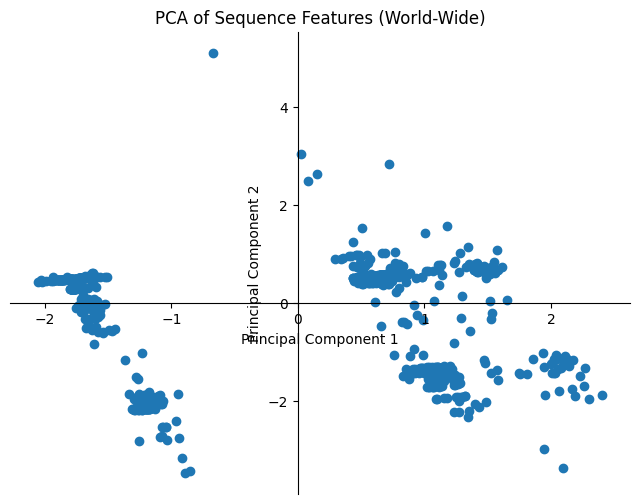

In [19]:

import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['Principal Component 1'], pca_df['Principal Component 2'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Sequence Features (World-Wide)')

ax = plt.gca()
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

plt.show()

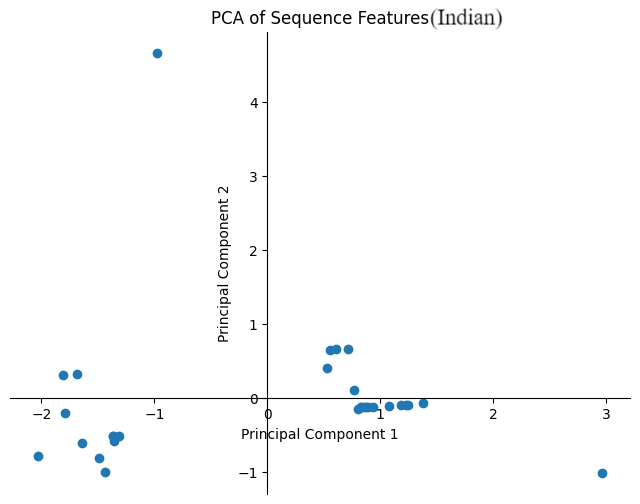